#Numerical Derivatives in Numpy and SciPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, create a function of variable $t$ with random noise added to avoid using a straight functional form.

In [28]:
t = np.linspace(-4.0*np.pi,4.0*np.pi,100)
y_smooth = (np.sin(t/2))**2 + np.cos(t/4)
np.random.seed()
y = y_smooth + 0.1*np.random.rand(len(t))
y = y - 0.1*np.random.rand(len(t))

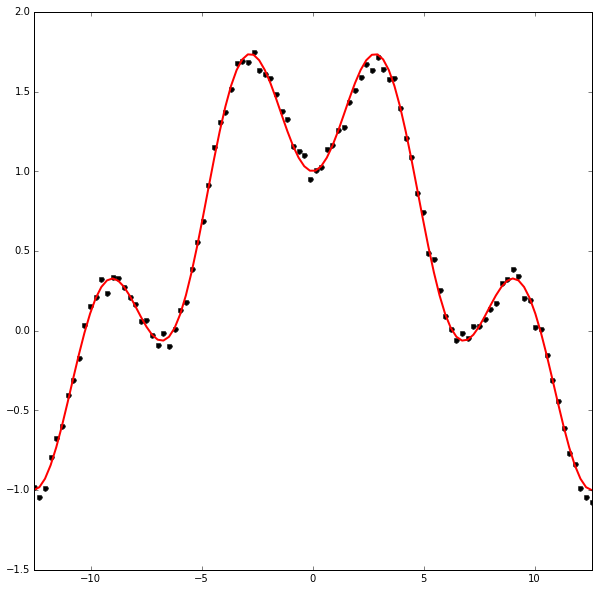

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(t,y,'k.',markersize=10)
ax.plot(t,y_smooth,'r',linewidth=2)
ax.set_xlim([t[0],t[-1]])
plt.show()

##Numpy Gradient Function

In [32]:
dt = t[1] - t[0]
dydt_smooth = np.gradient(y_smooth,dt)
dydt = np.gradient(y,dt)
dydt_exact = np.sin(t/2)*np.cos(t/2) - 1.0/4.0*np.sin(t/4)

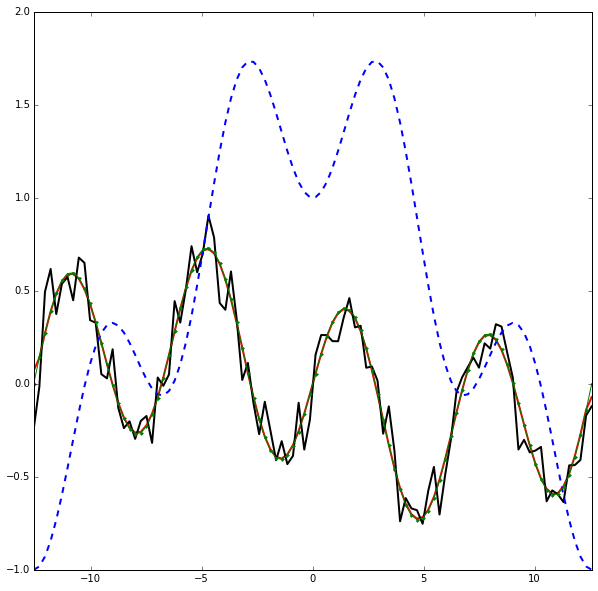

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(t,dydt_smooth,'r',linewidth=2)
ax.plot(t,dydt,'k',linewidth=2)
ax.plot(t,y_smooth,'--b',linewidth=2)
ax.plot(t,dydt_exact,'.-g')
ax.set_xlim([t[0],t[-1]])
plt.show()